# A practical introduction to Pandas


We have been asked to *analyze an otp dataset*, without much more information. This kind of scenario is more common than you might imagine!

## 1) Quickly examine the files in ~/Data/us_dot/otp. What do they contain, in both technical and functional terms? (Use any tool you want)

For this example, we are going to begin using the shell from within this notebook, with the ! notation:

A ! sign before a line tells the notebook to send that line straight away to the underlying OS. 

\* Note that we can substitute python variables into the shell command. We do that by surrounding the name of the variable with curly braces ({}). That's what we are going to do with the `path_to_files` variable

In [2]:
! ls ~/Data/us_dot/otp

On_Time_On_Time_Performance_2015_1.zip	On_Time_On_Time_Performance_2015_5.zip
On_Time_On_Time_Performance_2015_2.zip	On_Time_On_Time_Performance_2015_6.zip
On_Time_On_Time_Performance_2015_3.zip	On_Time_On_Time_Performance_2015_7.zip
On_Time_On_Time_Performance_2015_4.zip	On_Time_On_Time_Performance_2015_8.zip


Tenemos ocho archivos en .zip

### Check what the files contain

In [3]:
! unzip -l ~/Data/us_dot/otp/On_Time_On_Time_Performance_2015_8.zip

Archive:  /home/dsc/Data/us_dot/otp/On_Time_On_Time_Performance_2015_8.zip
  Length      Date    Time    Name
---------  ---------- -----   ----
230183662  2015-10-05 15:33   On_Time_On_Time_Performance_2015_8.csv
    12054  2015-10-05 15:33   readme.html
---------                     -------
230195716                     2 files


Oh, it has a readme! Always good to read it.

### Unzip the readme to the current directory

Use the shell

Remember, since the zip file contains several compressed files, we need to specify which one we want.

In [4]:
! unzip -o ~/Data/us_dot/otp/On_Time_On_Time_Performance_2015_8.zip readme.html -d .

# Descomprimimos el readme en la carpeta del notebook (.)
# la -o es de overwrite, porque si lo volvemos a hacer nos va a saltar un prompt de confirmación 
# y no vamos a poder responder

Archive:  /home/dsc/Data/us_dot/otp/On_Time_On_Time_Performance_2015_8.zip
  inflating: ./readme.html           


### Take a look at the beginning of the readme file

using the shell

In [5]:
! head readme.html

<HTML>
<HEAD>
	<TITLE> readme.html </TITLE>
</HEAD>
<BODY>
	<TABLE><TR><TD COLSPAN=2><H4>BACKGROUND</H4></TD></TR>
	<TR><TD COLSPAN=2>The data contained in the compressed file has been extracted from the 
	On-Time Performance data table of the "On-Time" database from the TranStats data library. 
	The time period is indicated in the name of the compressed file; 
	for example, XXX_XXXXX_2001_1 contains data of the first month of the year 2001. </TD></TR>


TranStats data library es una librería de datos de estadísticas de transporte. Son bases de datos con muy poco nivel de agregación.

Esta tabla tiene todas las salidas de aviones que se han producido mes a mes.

The readme file is html. Luckily, we are working in an html environment. 

### Display the contents of `readme.html` within the notebook
(Hint: check out [IPython.display.IFrame](https://ipython.org/ipython-doc/3/api/generated/IPython.display.html))

In [6]:
from IPython.display import IFrame

IFrame?

In [9]:
IFrame('readme.html', 800, 600)

Esto está muy bien para incrustar en notebooks htmls.

También podríamos incrustar webs

`IFrame('https://www.elpais.com',800,600)`

That's some very good documentation!

### Summary: 

The files within the zip are " quoted csv's. They contain information on timeliness of departures in the US, at the departure level.

In [10]:
! unzip -o ~/Data/us_dot/otp/On_Time_On_Time_Performance_2015_8.zip -d .

Archive:  /home/dsc/Data/us_dot/otp/On_Time_On_Time_Performance_2015_8.zip
  inflating: ./On_Time_On_Time_Performance_2015_8.csv  
  inflating: ./readme.html           


In [11]:
! head -n 5 On_Time_On_Time_Performance_2015_8.csv

"Year","Quarter","Month","DayofMonth","DayOfWeek","FlightDate","UniqueCarrier","AirlineID","Carrier","TailNum","FlightNum","OriginAirportID","OriginAirportSeqID","OriginCityMarketID","Origin","OriginCityName","OriginState","OriginStateFips","OriginStateName","OriginWac","DestAirportID","DestAirportSeqID","DestCityMarketID","Dest","DestCityName","DestState","DestStateFips","DestStateName","DestWac","CRSDepTime","DepTime","DepDelay","DepDelayMinutes","DepDel15","DepartureDelayGroups","DepTimeBlk","TaxiOut","WheelsOff","WheelsOn","TaxiIn","CRSArrTime","ArrTime","ArrDelay","ArrDelayMinutes","ArrDel15","ArrivalDelayGroups","ArrTimeBlk","Cancelled","CancellationCode","Diverted","CRSElapsedTime","ActualElapsedTime","AirTime","Flights","Distance","DistanceGroup","CarrierDelay","WeatherDelay","NASDelay","SecurityDelay","LateAircraftDelay","FirstDepTime","TotalAddGTime","LongestAddGTime","DivAirportLandings","DivReachedDest","DivActualElapsedTime","DivArrDelay","DivDistance","Div1Airport","Div1A

Pretty unreadable, so we go for a tool designed specifically for tabular data: **pandas**

### Load some of the data (one of the files) into memory as a pandas dataframe. What functions do you need to use?

Pro tip: there is no need to decompress the whole file. Check out zipfile.ZipFile

First, open a connection to one of the files

In [12]:
import pandas as pd

# Con otros archivos (.bz), pandas puede descomprimirlos directamente. Con .zip no.

pd.read_csv('~/Data/us_dot/otp/On_Time_On_Time_Performance_2015_8.zip')

# No porque dentro de .zip puede haber archivos de diferentes tipos. Para hacerlo:

ValueError: ('Multiple files found in compressed zip file %s', "['On_Time_On_Time_Performance_2015_8.csv', 'readme.html']")

In [16]:
from zipfile import ZipFile

# ZipFile nos devuelve un objeto sobre el que podemos hacer llamadas

zip_file = ZipFile('../Data/us_dot/otp/On_Time_On_Time_Performance_2015_8.zip')
zip_file

<zipfile.ZipFile filename='../Data/us_dot/otp/On_Time_On_Time_Performance_2015_8.zip' mode='r'>

In [17]:
# Este objeto tiene una serie de métodos:

zip_file.filelist

[<ZipInfo filename='On_Time_On_Time_Performance_2015_8.csv' compress_type=deflate filemode='-rw-r--r--' file_size=230183662 compress_size=25723470>,
 <ZipInfo filename='readme.html' compress_type=deflate filemode='-rw-r--r--' file_size=12054 compress_size=2208>]

zip_file is a connection to the compressed file, the .zip. We can use it to open a connection to one of the files it contains, which will behave like a normal uncompressed file that we had opened with open()

In [26]:
# Cómo abrimos una conexión con el archivo?

csv_file = zip_file.open(zip_file.filelist[0])

# Abrimos el primer archivo en la lista
csv_file

<zipfile.ZipExtFile name='On_Time_On_Time_Performance_2015_8.csv' mode='r' compress_type=deflate>

Now we're ready to load the file into memory as a pandas dataframe. Remember to close the connections to the files!

In [27]:
df = pd.read_csv(csv_file)

/home/dsc/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (48,77,84) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Let's start examining the data: show the beginning of the file. How many records does it contain?

In [28]:
df.head()

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,UniqueCarrier,AirlineID,Carrier,TailNum,...,Div4TailNum,Div5Airport,Div5AirportID,Div5AirportSeqID,Div5WheelsOn,Div5TotalGTime,Div5LongestGTime,Div5WheelsOff,Div5TailNum,Unnamed: 109
0,2015,3,8,2,7,2015-08-02,AA,19805,AA,N790AA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,3,8,3,1,2015-08-03,AA,19805,AA,N784AA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,3,8,4,2,2015-08-04,AA,19805,AA,N793AA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,3,8,5,3,2015-08-05,AA,19805,AA,N787AA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,3,8,6,4,2015-08-06,AA,19805,AA,N790AA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
# Hacemos un backup

df_backup = df.copy()

In [29]:
# Truquito: con pd.options tenemos algunas opciones de display

pd.options.display.max_columns = None  # Con esto le digo que me muestre las columnas de por medio.

In [30]:
df.head()

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,UniqueCarrier,AirlineID,Carrier,TailNum,FlightNum,OriginAirportID,OriginAirportSeqID,OriginCityMarketID,Origin,OriginCityName,OriginState,OriginStateFips,OriginStateName,OriginWac,DestAirportID,DestAirportSeqID,DestCityMarketID,Dest,DestCityName,DestState,DestStateFips,DestStateName,DestWac,CRSDepTime,DepTime,DepDelay,DepDelayMinutes,DepDel15,DepartureDelayGroups,DepTimeBlk,TaxiOut,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrTime,ArrDelay,ArrDelayMinutes,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,Cancelled,CancellationCode,Diverted,CRSElapsedTime,ActualElapsedTime,AirTime,Flights,Distance,DistanceGroup,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,FirstDepTime,TotalAddGTime,LongestAddGTime,DivAirportLandings,DivReachedDest,DivActualElapsedTime,DivArrDelay,DivDistance,Div1Airport,Div1AirportID,Div1AirportSeqID,Div1WheelsOn,Div1TotalGTime,Div1LongestGTime,Div1WheelsOff,Div1TailNum,Div2Airport,Div2AirportID,Div2AirportSeqID,Div2WheelsOn,Div2TotalGTime,Div2LongestGTime,Div2WheelsOff,Div2TailNum,Div3Airport,Div3AirportID,Div3AirportSeqID,Div3WheelsOn,Div3TotalGTime,Div3LongestGTime,Div3WheelsOff,Div3TailNum,Div4Airport,Div4AirportID,Div4AirportSeqID,Div4WheelsOn,Div4TotalGTime,Div4LongestGTime,Div4WheelsOff,Div4TailNum,Div5Airport,Div5AirportID,Div5AirportSeqID,Div5WheelsOn,Div5TotalGTime,Div5LongestGTime,Div5WheelsOff,Div5TailNum,Unnamed: 109
0,2015,3,8,2,7,2015-08-02,AA,19805,AA,N790AA,1,12478,1247803,31703,JFK,"New York, NY",NY,36,New York,22,12892,1289203,32575,LAX,"Los Angeles, CA",CA,6,California,91,900,854.0,-6.0,0.0,0.0,-1.0,0900-0959,25.0,919.0,1132.0,15.0,1213,1147.0,-26.0,0.0,0.0,-2.0,1200-1259,0.0,NaN,0.0,373.0,353.0,313.0,1.0,2475.0,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,3,8,3,1,2015-08-03,AA,19805,AA,N784AA,1,12478,1247803,31703,JFK,"New York, NY",NY,36,New York,22,12892,1289203,32575,LAX,"Los Angeles, CA",CA,6,California,91,900,858.0,-2.0,0.0,0.0,-1.0,0900-0959,33.0,931.0,1147.0,31.0,1213,1218.0,5.0,5.0,0.0,0.0,1200-1259,0.0,NaN,0.0,373.0,380.0,316.0,1.0,2475.0,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,3,8,4,2,2015-08-04,AA,19805,AA,N793AA,1,12478,1247803,31703,JFK,"New York, NY",NY,36,New York,22,12892,1289203,32575,LAX,"Los Angeles, CA",CA,6,California,91,900,902.0,2.0,2.0,0.0,0.0,0900-0959,43.0,945.0,1211.0,8.0,1213,1219.0,6.0,6.0,0.0,0.0,1200-1259,0.0,NaN,0.0,373.0,377.0,326.0,1.0,2475.0,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,3,8,5,3,2015-08-05,AA,19805,AA,N787AA,1,12478,1247803,31703,JFK,"New York, NY",NY,36,New York,22,12892,1289203,32575,LAX,"Los Angeles, CA",CA,6,California,91,900,857.0,-3.0,0.0,0.0,-1.0,0900-0959,39.0,936.0,1207.0,28.0,1213,1235.0,22.0,22.0,1.0,1.0,1200-1259,0.0,NaN,0.0,373.0,398.0,331.0,1.0,2475.0,10,0.0,0.0,22.0,0.0,0.0,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,3,8,6,4,2015-08-06,AA,19805,AA,N790AA,1,12478,1247803,31703,JFK,"New York, NY",NY,36,New York,22,12892,1289203,32575,LAX,"Los Angeles, CA",CA,6,California,91,900,857.0,-3.0,0.0,0.0,-1.0,0900-0959,46.0,943.0,1209.0,14.0,1213,1223.0,10.0,10.0,0.0,0.0,1200-1259,0.0,NaN,0.0,373.0,386.0,326.0,1.0,2475.0,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [31]:
len(df)

510536

In [33]:
df.shape

(510536, 110)

## Trimming the data

The table is quite wide, and it seems that there are many columns without much data. Which, exactly, are those? (let's consider empty a column that doesn't contain at least 1000 records, arbitrarily)

In [36]:
# Count nos cuenta el número de registros no nulos

df.count()

Year                  510536
Quarter               510536
Month                 510536
DayofMonth            510536
DayOfWeek             510536
FlightDate            510536
UniqueCarrier         510536
AirlineID             510536
Carrier               510536
TailNum               509727
FlightNum             510536
OriginAirportID       510536
OriginAirportSeqID    510536
OriginCityMarketID    510536
Origin                510536
OriginCityName        510536
OriginState           510536
OriginStateFips       510536
OriginStateName       510536
OriginWac             510536
DestAirportID         510536
DestAirportSeqID      510536
DestCityMarketID      510536
Dest                  510536
DestCityName          510536
DestState             510536
DestStateFips         510536
DestStateName         510536
DestWac               510536
CRSDepTime            510536
                       ...  
Div2WheelsOn              10
Div2TotalGTime            10
Div2LongestGTime          10
Div2WheelsOff 

In [60]:
# Columnas con menos de 1000 registros:

nearly_empty_columns = df.count()[df.count()<1000]
nearly_empty_columns

Div2Airport         10
Div2AirportID       10
Div2AirportSeqID    10
Div2WheelsOn        10
Div2TotalGTime      10
Div2LongestGTime    10
Div2WheelsOff        3
Div2TailNum          3
Div3Airport          0
Div3AirportID        0
Div3AirportSeqID     0
Div3WheelsOn         0
Div3TotalGTime       0
Div3LongestGTime     0
Div3WheelsOff        0
Div3TailNum          0
Div4Airport          0
Div4AirportID        0
Div4AirportSeqID     0
Div4WheelsOn         0
Div4TotalGTime       0
Div4LongestGTime     0
Div4WheelsOff        0
Div4TailNum          0
Div5Airport          0
Div5AirportID        0
Div5AirportSeqID     0
Div5WheelsOn         0
Div5TotalGTime       0
Div5LongestGTime     0
Div5WheelsOff        0
Div5TailNum          0
Unnamed: 109         0
dtype: int64

It seems that the "diverted" fields, after the first, are often empty. No big surprise, since not that many flights must be diverted more than once in a month. Let's drop those columns, since we are not that interested in those, at least for now.

In [62]:
only_full = df.dropna(axis = 1, thresh=1000)

In [65]:
only_full.shape

(510536, 77)

Now that we have eliminated some inconvenient data columns, let's have a look at the rest: let's loook at how the location data is encoded.


#### Exercise:

First, generate a list of the columns that have 'Origin' in their name

Second, show a sample of the values that those columns take.

Hint: we are going to use the str attribute of Series and Indexes


In [80]:
# Podría hacerlo con un for loop recorriendo la lista de columnas cumpliendo una condición.

# Pero mucho más fácil con str. Además es peor computacionalmente.

# Str es un atributo de series e índices

columns_origin = only_full.columns[only_full.columns.str.contains('Origin')]

# Cojo las columnas (que es una lista de índices): only_full.columns -> es un objeto índice

# y aplico la condición con contains

columns_origin

only_full[columns_origin].head(5)

,OriginAirportID,OriginAirportSeqID,OriginCityMarketID,Origin,OriginCityName,OriginState,OriginStateFips,OriginStateName,OriginWac
0,12478,1247803,31703,JFK,"New York, NY",NY,36,New York,22
1,12478,1247803,31703,JFK,"New York, NY",NY,36,New York,22
2,12478,1247803,31703,JFK,"New York, NY",NY,36,New York,22
3,12478,1247803,31703,JFK,"New York, NY",NY,36,New York,22
4,12478,1247803,31703,JFK,"New York, NY",NY,36,New York,22


So much redundant information!

In [78]:
# Miramos cuántas tail nums (matrículas) corresponden a AA

tail_nums = only_full['TailNum']

In [79]:
%%timeit

american = tail_nums.str.endswith('AA')

156 ms ± 7.59 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


## Fast forward

Just taking out the redundant columns would take a while, so let's jump ahead with this list of interesting columns:

In [81]:
df2 = df[['FlightDate', 'DayOfWeek', 'Carrier', 'TailNum', 'FlightNum', 'Origin', 
         'OriginCityName', 'OriginStateName', 'Dest', 'DestCityName', 'DestStateName',
         'DepTime', 'DepDelay', 'AirTime', 'Distance']]
df2.sample(5)

,FlightDate,DayOfWeek,Carrier,TailNum,FlightNum,Origin,OriginCityName,OriginStateName,Dest,DestCityName,DestStateName,DepTime,DepDelay,AirTime,Distance
484884,2015-08-31,1,EV,N713EV,5041,LGA,"New York, NY",New York,MSN,"Madison, WI",Wisconsin,2055.0,0.0,103.0,812.0
488014,2015-08-07,5,EV,N14186,4562,IAH,"Houston, TX",Texas,CLE,"Cleveland, OH",Ohio,1256.0,-4.0,138.0,1091.0
369701,2015-08-14,5,UA,N36469,1532,ORD,"Chicago, IL",Illinois,MSY,"New Orleans, LA",Louisiana,2051.0,1.0,103.0,837.0
19767,2015-08-13,4,AA,N3CFAA,1239,ORD,"Chicago, IL",Illinois,SEA,"Seattle, WA",Washington,1203.0,3.0,234.0,1721.0
246024,2015-08-16,7,WN,N734SA,187,MDW,"Chicago, IL",Illinois,CHS,"Charleston, SC",South Carolina,854.0,4.0,99.0,745.0


## Formatting columns and parsing dates and times

Hurray! we have almost cleaned our dataset. Soon we will begin to do some actual work with it. 

In [82]:
df2.dtypes

FlightDate          object
DayOfWeek            int64
Carrier             object
TailNum             object
FlightNum            int64
Origin              object
OriginCityName      object
OriginStateName     object
Dest                object
DestCityName        object
DestStateName       object
DepTime            float64
DepDelay           float64
AirTime            float64
Distance           float64
dtype: object

Pandas interpreted the **Deptime** column as float (porque eran números estilo 0800. ¿Pero y por qué no lo ha hecho con enteros? Porque había nulos, y los nulos son de tipo **float**. 

And the **FlighDate** column as strings. We want to combine them and parse them into a DateTime column, so that we can use them properly as datetimes.

First step:

#### Exercise

Define a function that will parse our float hours into a reasonable format ("HH:MM"). It should take only one int hour and return the appropriate representation.

In [104]:
# Hecho por mí

def float_hour_to_string_MFZ(floathour):
    if floathour < 1000:
        aux = '0' + str(floathour)
        aux2 = aux[:4]
        string_rep = aux2[:2] + ':' + aux2[2:4]
    else:
        aux3 = str(floathour)
        string_rep = aux3[:2] + ':' + aux3[2:4]
    
    return string_rep

print(float_hour_to_string_MFZ(1452.0))
print(float_hour_to_string_MFZ(554.0))

14:52
05:54


In [109]:
# Corrección

def float_hour_to_string_1(float_hour):
    
    str_input = str(float_hour).zfill(6)
    hour = str_input[:2]
    minute = str_input[2:4]
    
    string_rep = '%s:%s' % (hour, minute)
    
    return string_rep
    
print(float_hour_to_string_1(1452.0))
print(float_hour_to_string_1(554.0))

14:52
05:54


In [124]:
# Otra manera

def float_hour_to_string(float_hour):
    
    hour = (float_hour // 100) % 24  # División entera. Lo del 24 es porque en la tabla hay horas 24:01
    minutes = float_hour % 100  # El resto de dividir entre 100 son los minutos
    
    return '%.2d:%.2d' % (hour, minutes)  # Le digo que es de dos dígitos

print(float_hour_to_string(1452.0))
print(float_hour_to_string(554.0))
print(float_hour_to_string(2400.0))


14:52
05:54
00:00


Now, we can use that function to build datetime strings that we will then pass to pd.to_datetime, with a format we will specify. Let's do that

Hint: Check out [pd.to_datetime's documentatoin](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html) for info on the acceptable format.

In [125]:
pd.to_datetime('2018-05-26')

Timestamp('2018-05-26 00:00:00')

In [126]:
pd.to_datetime('2018-05-26T11:03')

Timestamp('2018-05-26 11:03:00')

In [127]:
date_strings = df['FlightDate']
date_strings[:2]

0    2015-08-02
1    2015-08-03
Name: FlightDate, dtype: object

In [128]:
time_strings = df['DepTime'].map(float_hour_to_string)
time_strings[:3]

ValueError: cannot convert float NaN to integer

In [129]:
# Esto me peta por los NAN, no puedo usar map si hay NAN. Sin embargo, hay un argumento muy bueno en map

time_strings = df['DepTime'].map(float_hour_to_string, na_action = 'ignore')
time_strings[:3]

0    08:54
1    08:58
2    09:02
Name: DepTime, dtype: object

In [130]:
(date_strings + ' ' + time_strings)[:3]

0    2015-08-02 08:54
1    2015-08-03 08:58
2    2015-08-04 09:02
dtype: object

In [133]:
datetimes = pd.to_datetime(date_strings + ' ' + time_strings)
datetimes.sample(3)

# Es de tipo datetime

21688    2015-08-23 22:18:00
167609   2015-08-07 12:46:00
168209   2015-08-08 15:58:00
dtype: datetime64[ns]

#### Exercise

Overwrite the 'DepTime' column with its version in the proper format

Hint: Before overwriting your column in the dataframe, make sure that everything works by assigning the modified column to a Series variable.

In [ ]:
# Hecho

#### Exercise

Now, create a DepDateTime with the proper type using `pd.to_datetime`

In [135]:
df2['DepDateTime'] = datetimes

# Ni caso al warning

/home/dsc/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [136]:
df2.head(3)

,FlightDate,DayOfWeek,Carrier,TailNum,FlightNum,Origin,OriginCityName,OriginStateName,Dest,DestCityName,DestStateName,DepTime,DepDelay,AirTime,Distance,DepDateTime
0,2015-08-02,7,AA,N790AA,1,JFK,"New York, NY",New York,LAX,"Los Angeles, CA",California,854.0,-6.0,313.0,2475.0,2015-08-02 08:54:00
1,2015-08-03,1,AA,N784AA,1,JFK,"New York, NY",New York,LAX,"Los Angeles, CA",California,858.0,-2.0,316.0,2475.0,2015-08-03 08:58:00
2,2015-08-04,2,AA,N793AA,1,JFK,"New York, NY",New York,LAX,"Los Angeles, CA",California,902.0,2.0,326.0,2475.0,2015-08-04 09:02:00


### Inspect the types, see if everything is in order

In [145]:
df2.dtypes  # OK

FlightDate                 object
DayOfWeek                   int64
Carrier                    object
TailNum                    object
FlightNum                   int64
Origin                     object
OriginCityName             object
OriginStateName            object
Dest                       object
DestCityName               object
DestStateName              object
DepTime                   float64
DepDelay                  float64
AirTime                   float64
Distance                  float64
DepDateTime        datetime64[ns]
dtype: object

## Examining the data

Finally clean! Let's start to do some preliminary work on the data.

#### Exercise:

Find the biggest delays. 

How would you find the 5 maximum delays?

In [149]:
df2.sort_values(by = 'DepDelay', ascending = False)['DepDelay'][:5]

4106     1878.0
7165     1515.0
19225    1402.0
33642    1259.0
7028     1235.0
Name: DepDelay, dtype: float64

In [151]:
df2.sort_values(by = 'DepDelay', ascending = False).head()

,FlightDate,DayOfWeek,Carrier,TailNum,FlightNum,Origin,OriginCityName,OriginStateName,Dest,DestCityName,DestStateName,DepTime,DepDelay,AirTime,Distance,DepDateTime
4106,2015-08-01,6,AA,N479AA,96,RIC,"Richmond, VA",Virginia,DFW,"Dallas/Fort Worth, TX",Texas,1427.0,1878.0,156.0,1158.0,2015-08-01 14:27:00
7165,2015-08-23,7,AA,N5ERAA,270,HNL,"Honolulu, HI",Hawaii,LAX,"Los Angeles, CA",California,825.0,1515.0,299.0,2556.0,2015-08-23 08:25:00
19225,2015-08-01,6,AA,N503AA,1291,MKE,"Milwaukee, WI",Wisconsin,DFW,"Dallas/Fort Worth, TX",Texas,627.0,1402.0,108.0,853.0,2015-08-01 06:27:00
33642,2015-08-10,1,AA,N469AA,2263,CMH,"Columbus, OH",Ohio,DFW,"Dallas/Fort Worth, TX",Texas,824.0,1259.0,125.0,926.0,2015-08-10 08:24:00
7028,2015-08-10,1,AA,N5DHAA,266,LIH,"Lihue, HI",Hawaii,LAX,"Los Angeles, CA",California,1033.0,1235.0,292.0,2615.0,2015-08-10 10:33:00


In [150]:
# Miramos los negativos por si acaso

df2.sort_values(by = 'DepDelay', ascending = True)['DepDelay'][:5]

337113   -42.0
457321   -39.0
350433   -36.0
350290   -36.0
346081   -35.0
Name: DepDelay, dtype: float64

#### Exercise

What was the average delay for this month? Standard deviation and typical value?

In [155]:
df2['DepDelay'].describe()

count    505817.000000
mean          9.932045
std          36.920822
min         -42.000000
25%          -5.000000
50%          -1.000000
75%           8.000000
max        1878.000000
Name: DepDelay, dtype: float64

/home/dsc/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


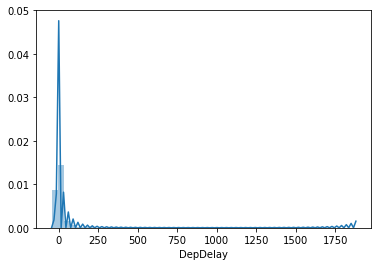

In [161]:
import seaborn as sns
%matplotlib inline


sns.distplot(df2['DepDelay'].dropna())  # Sin NANs

/home/dsc/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


(-50, 250)

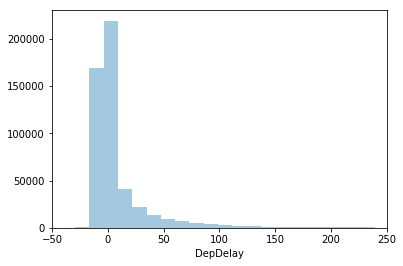

In [163]:
# Para ampliar. Para "pasar" de seaborn as matplotlib: plt.gca (get current axes)

import matplotlib.pyplot as plt

sns.distplot(df2['DepDelay'].dropna(), bins = 150, kde = False)  # Sin NANs

axes = plt.gca()  # Me coge el panel que tenía de seaborn y lo mete en axes para poder hacerle cosas.
axes.set_xlim(-50, 250, )

Also: a quick look at the correlation between the numerical variables is extremely easy with pandas and seaborn:

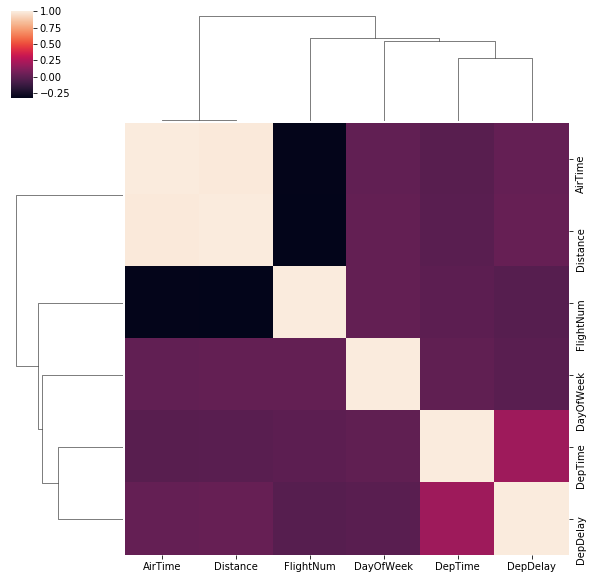

In [169]:
correlations = df2.corr()

sns.clustermap(correlations) 

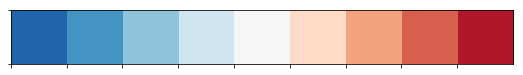

In [175]:
# Cogemos un mapa de color divergente.

palette = sns.palplot(sns.color_palette("RdBu_r", 9))  

# 9 es el número de steps. 
# En divergente siempre querremos impares para que haya uno en medio.

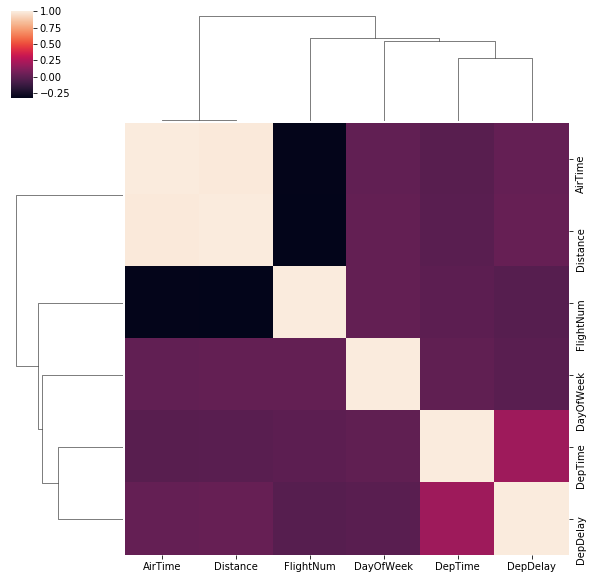

In [248]:
sns.clustermap(correlations, cmap = palette)  # No sé por qué no me sale

#### Exercise

American Airlines is very common among the top delayed flights. Does that mean it is a significantly worse performer than other airlines? Let's check, examining the distibution of delays for different airlines.

Extract max, mean, and std of DepDelay for each Carrier

In [196]:
df2.groupby('Carrier')['DepDelay'].agg(['max','mean','std']).head(5)

,max,mean,std
Carrier,,,
AA,1878.0,9.357355,40.060019
AS,514.0,3.668762,24.959419
B6,522.0,14.604436,41.942031
DL,1207.0,7.746436,35.728115
EV,762.0,7.785358,36.607800


In [195]:
# Forma fácil

df2.groupby('Carrier')['DepDelay'].describe().sort_values(by = 'mean', ascending = False).head(5)

,count,mean,std,min,25%,50%,75%,max
Carrier,,,,,,,,
NK,10257.0,22.256118,49.205307,-25.0,-4.0,2.0,28.0,679.0
B6,23579.0,14.604436,41.942031,-26.0,-5.0,-1.0,14.0,522.0
UA,45101.0,14.306113,39.421729,-36.0,-3.0,1.0,13.0,739.0
WN,107146.0,11.738553,33.618683,-21.0,-3.0,0.0,11.0,620.0
AA,79025.0,9.357355,40.060019,-27.0,-5.0,-2.0,6.0,1878.0


#### Exercise

What is the plane that has the highest average delay? We'll first group by tail number (the *license plate* of a plane) and then calculate the relevant statistic for each group (group of *departures*)

In [212]:
df2.groupby('TailNum').mean().sort_values(by = 'DepDelay', ascending = False).head(1)

,DayOfWeek,FlightNum,DepTime,DepDelay,AirTime,Distance
TailNum,,,,,,
N37018,7.0,252.5,1933.0,293.0,441.5,3904.0


Oh, but those numbers smell like these planes had only a few, very delayed, departures! how can we count the number of departures *and* calculate the average delay at the same time?

In [219]:
# Otra manera

delay_distribution_byplane = df2.groupby('TailNum')['DepDelay'].describe().sort_values(by = 'mean', ascending = False)
delay_distribution_byplane.head()

,count,mean,std,min,25%,50%,75%,max
TailNum,,,,,,,,
N37018,2.0,293.000000,142.835570,192.0,242.5,293.0,343.5,394.0
N218UA,1.0,270.000000,NaN,270.0,270.0,270.0,270.0,270.0
N283AY,2.0,208.000000,0.000000,208.0,208.0,208.0,208.0,208.0
N795UA,1.0,193.000000,NaN,193.0,193.0,193.0,193.0,193.0
N7AEAA,3.0,191.666667,327.649711,1.0,2.5,4.0,287.0,570.0


Awesome! now, let's look at the average delay of the planes with some departures (let's say, at least 15)

In [221]:
delay_distribution_byplane[delay_distribution_byplane['count'] >=15].head(10)

,count,mean,std,min,25%,50%,75%,max
TailNum,,,,,,,,
N357AA,21.0,90.047619,228.530846,-10.0,-3.00,0.0,55.0,928.0
N13110,16.0,74.187500,105.862312,-11.0,1.75,18.5,141.0,301.0
N448SW,19.0,71.473684,86.233770,-9.0,3.50,40.0,131.5,303.0
N780UA,19.0,62.368421,155.301216,-4.0,4.50,14.0,50.0,686.0
N374SW,23.0,61.173913,89.019228,-8.0,3.00,19.0,62.5,266.0
N76064,15.0,59.000000,74.291895,3.0,11.00,21.0,94.0,205.0
N8ACAA,16.0,56.187500,116.334127,-8.0,-3.00,1.0,55.0,374.0
N5ELAA,78.0,50.076923,158.459612,-11.0,-2.00,5.5,49.0,1209.0
N73275,59.0,49.949153,82.525947,-8.0,6.50,20.0,41.0,342.0


In [224]:
# Hay uno con 143 salidas y 48 min de retraso de media. Vemos su carrier

df2[df2['TailNum'] == 'N504NK']['Carrier'].unique()

array(['NK'], dtype=object)

#### Exercise: 

Show cities by descending number of airports

In [182]:
df2.head()

,FlightDate,DayOfWeek,Carrier,TailNum,FlightNum,Origin,OriginCityName,OriginStateName,Dest,DestCityName,DestStateName,DepTime,DepDelay,AirTime,Distance,DepDateTime
0,2015-08-02,7,AA,N790AA,1,JFK,"New York, NY",New York,LAX,"Los Angeles, CA",California,854.0,-6.0,313.0,2475.0,2015-08-02 08:54:00
1,2015-08-03,1,AA,N784AA,1,JFK,"New York, NY",New York,LAX,"Los Angeles, CA",California,858.0,-2.0,316.0,2475.0,2015-08-03 08:58:00
2,2015-08-04,2,AA,N793AA,1,JFK,"New York, NY",New York,LAX,"Los Angeles, CA",California,902.0,2.0,326.0,2475.0,2015-08-04 09:02:00
3,2015-08-05,3,AA,N787AA,1,JFK,"New York, NY",New York,LAX,"Los Angeles, CA",California,857.0,-3.0,331.0,2475.0,2015-08-05 08:57:00
4,2015-08-06,4,AA,N790AA,1,JFK,"New York, NY",New York,LAX,"Los Angeles, CA",California,857.0,-3.0,326.0,2475.0,2015-08-06 08:57:00


In [235]:
df2.groupby(by = 'OriginCityName')['Origin'].describe().sort_values('unique', ascending=False).head()

# Agrúpame por OriginCityName, y de Origin devuélveme el describe.

# Al final para agrupar yo agrupo en base a una variable, y muestro en base a otra.

,count,unique,top,freq
OriginCityName,,,,
"Chicago, IL",36077,2,ORD,28149
"Houston, TX",18313,2,IAH,13419
"New York, NY",18439,2,LGA,9241
"Washington, DC",10224,2,DCA,6988
"Newport News/Williamsburg, VA",119,1,PHF,119


## Plotting

There are several ways in which we could go about plotting this dataset in order to get acquainted with it. 

For example, do the delays have a relationship with the number of departures a plane does?

#### Exercise

Do a scatter plot with matplotlib. Check the documentation

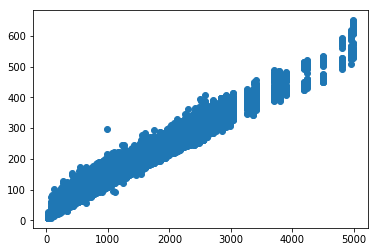

In [236]:
plt.scatter(df2['Distance'], df2['AirTime'])

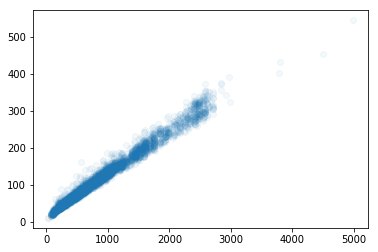

In [244]:
# Tarda mucho. Con una muestra:

sample = df2.sample(5000)
plt.scatter(sample['Distance'], sample['AirTime'], alpha = 0.05)

In [239]:
delay_distribution_byplane.head()

,count,mean,std,min,25%,50%,75%,max
TailNum,,,,,,,,
N37018,2.0,293.000000,142.835570,192.0,242.5,293.0,343.5,394.0
N218UA,1.0,270.000000,NaN,270.0,270.0,270.0,270.0,270.0
N283AY,2.0,208.000000,0.000000,208.0,208.0,208.0,208.0,208.0
N795UA,1.0,193.000000,NaN,193.0,193.0,193.0,193.0,193.0
N7AEAA,3.0,191.666667,327.649711,1.0,2.5,4.0,287.0,570.0


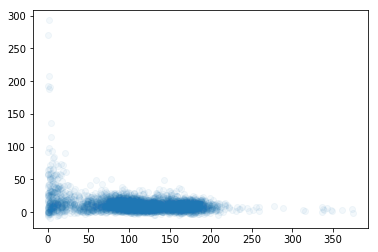

In [242]:
plt.scatter(delay_distribution_byplane['count'], delay_distribution_byplane['mean'],alpha=0.05)

Pretty impossible to see anything in there. Maybe a different kind of plottting is required:

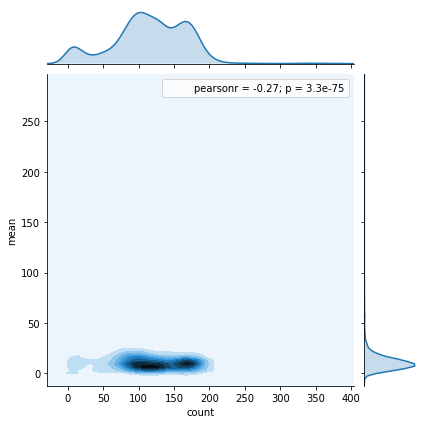

In [247]:
sns.jointplot(data = delay_distribution_byplane, x='count', y='mean', kind = 'kde')

Vemos que la distriución de la media de los retrasos es normal -> **TCL**

#### Exercise:

Plot the distribution of delays as a histogram, both with a linear and a logarithmic scale

/home/dsc/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


(-50, 250)

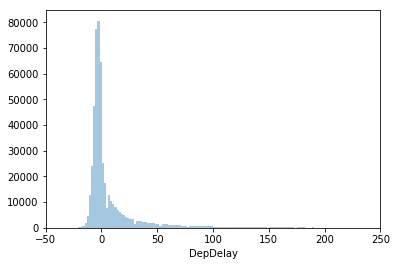

In [255]:
# Escala lineal

sns.distplot(df2['DepDelay'].dropna(), bins = 1000, kde = False)  

axes = plt.gca() 
axes.set_xlim(-50, 250)

/home/dsc/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


[]

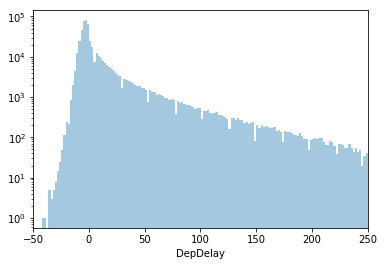

In [257]:
# Escala logarítmica

sns.distplot(df2['DepDelay'].dropna(), bins = 1000, kde = False)  

axes = plt.gca() 
axes.set_xlim(-50, 250)
axes.semilogy()

### Another question:

how do the delays stack over the course of the day? We are going to look at it by plotting the distribution of delays for each hour of the day. The very best way to compare distributions side by side is a boxplot, so we'll use that.

We need to provide `plt.boxplot()` with a sequence that contains 24 elements. Each of those will be a sequence containing every individual delay for one hour of the day. We'll need, therefore, to extract hours of the day for each departure and group based on that.

In [258]:
plt.boxplot?

# Tenemos que pasarle 24 vectores, uno para cada hora

In [260]:
df2.head()

,FlightDate,DayOfWeek,Carrier,TailNum,FlightNum,Origin,OriginCityName,OriginStateName,Dest,DestCityName,DestStateName,DepTime,DepDelay,AirTime,Distance,DepDateTime
0,2015-08-02,7,AA,N790AA,1,JFK,"New York, NY",New York,LAX,"Los Angeles, CA",California,854.0,-6.0,313.0,2475.0,2015-08-02 08:54:00
1,2015-08-03,1,AA,N784AA,1,JFK,"New York, NY",New York,LAX,"Los Angeles, CA",California,858.0,-2.0,316.0,2475.0,2015-08-03 08:58:00
2,2015-08-04,2,AA,N793AA,1,JFK,"New York, NY",New York,LAX,"Los Angeles, CA",California,902.0,2.0,326.0,2475.0,2015-08-04 09:02:00
3,2015-08-05,3,AA,N787AA,1,JFK,"New York, NY",New York,LAX,"Los Angeles, CA",California,857.0,-3.0,331.0,2475.0,2015-08-05 08:57:00
4,2015-08-06,4,AA,N790AA,1,JFK,"New York, NY",New York,LAX,"Los Angeles, CA",California,857.0,-3.0,326.0,2475.0,2015-08-06 08:57:00


In [273]:
# Extraemos la hora. Los datetimes tienen el atributo hour, pero si le paso una serie me peta.

# Antes hacíamos .str, ahora .dt

deptimes = df2['DepDateTime']

df2['DepHour'] = deptimes.dt.hour

df2.head()

/home/dsc/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


,FlightDate,DayOfWeek,Carrier,TailNum,FlightNum,Origin,OriginCityName,OriginStateName,Dest,DestCityName,DestStateName,DepTime,DepDelay,AirTime,Distance,DepDateTime,DepHour
0,2015-08-02,7,AA,N790AA,1,JFK,"New York, NY",New York,LAX,"Los Angeles, CA",California,854.0,-6.0,313.0,2475.0,2015-08-02 08:54:00,8.0
1,2015-08-03,1,AA,N784AA,1,JFK,"New York, NY",New York,LAX,"Los Angeles, CA",California,858.0,-2.0,316.0,2475.0,2015-08-03 08:58:00,8.0
2,2015-08-04,2,AA,N793AA,1,JFK,"New York, NY",New York,LAX,"Los Angeles, CA",California,902.0,2.0,326.0,2475.0,2015-08-04 09:02:00,9.0
3,2015-08-05,3,AA,N787AA,1,JFK,"New York, NY",New York,LAX,"Los Angeles, CA",California,857.0,-3.0,331.0,2475.0,2015-08-05 08:57:00,8.0
4,2015-08-06,4,AA,N790AA,1,JFK,"New York, NY",New York,LAX,"Los Angeles, CA",California,857.0,-3.0,326.0,2475.0,2015-08-06 08:57:00,8.0


In [298]:
# Lo que yo quiero es, para cada hora, que me de todos los DepDelay

# Se podría hacer con un diccionario, con un for, y que me lo vaya rellenando (era mi idea). Pero más fácil:

delays_per_hour = df2['DepDelay'].groupby(deptimes.dt.hour)

In [297]:
delays_per_hour.groups  # Esto me hace lo que quiero. Me devuelve un diccionario en el que las

# keys son las horas y los values son todos los valores (sin agregar) de esas keys.

{0.0: Int64Index([   609,    845,    858,    861,    969,   3846,   3930,   3937,
               6183,   6184,
             ...
             508295, 508367, 508461, 509003, 509034, 509049, 509069, 509080,
             509081, 509324],
            dtype='int64', length=2804),
 1.0: Int64Index([   980,   5157,   6195,   7111,  12358,  12361,  14266,  14267,
              14269,  14270,
             ...
             509625, 509626, 509627, 509628, 509631, 509632, 509633, 509634,
             509635, 509636],
            dtype='int64', length=856),
 2.0: Int64Index([ 16396,  16397,  17259,  31695,  32387,  39184,  39228,  44736,
              48553,  49936,
             ...
             459299, 492298, 503409, 506638, 507898, 508148, 509179, 509612,
             509615, 509629],
            dtype='int64', length=212),
 3.0: Int64Index([ 17263,  25862,  49392,  49401,  49617,  51586,  81158,  84005,
              92464,  92766,
             ...
             382396, 392474, 407250, 417179, 4

In [299]:
# La manera del bucle:

keys = []
groups = []

for key, group in delays_per_hour:
    keys.append(key)
    groups.append(group)
    
groups[0].head()

609    272.0
845     64.0
858     93.0
861     76.0
969    157.0
Name: DepDelay, dtype: float64

In [ ]:
# O más elegante

keys, groups = [key, group for key, group in delays_per_hour]

Truquito: `zip`

In [300]:
a = [(1,2), (3,4), (5,6)]

b = list(zip(*a))
b

[(1, 3, 5), (2, 4, 6)]

In [301]:
# El asterisco es porque:

pow(2,3)


8

In [302]:
l = [2,3]
pow(l)

TypeError: pow expected at least 2 arguments, got 1

In [303]:
pow(*l)

8

In [309]:
# Volvemos

keys, groups = zip(*[(int(key), group) for key, group in delays_per_hour])

groups

(609       272.0
 845        64.0
 858        93.0
 861        76.0
 969       157.0
 3846      320.0
 3930      107.0
 3937      120.0
 6183       -2.0
 6184       -5.0
 6185        6.0
 6186       33.0
 6187        0.0
 6188       -1.0
 6189       12.0
 6190        1.0
 6191       -4.0
 6192       -4.0
 6193       -8.0
 6194       -3.0
 6196       -2.0
 6197        7.0
 6198       -8.0
 6199        0.0
 6200        9.0
 6201       -3.0
 6202       -2.0
 6203       31.0
 6204       -6.0
 6205       -6.0
           ...  
 507340     -5.0
 507348     14.0
 507426     16.0
 507467     14.0
 507505      9.0
 507511     60.0
 507537      6.0
 507586     23.0
 507637     -8.0
 507877     -2.0
 507897     33.0
 507901     25.0
 507917     -8.0
 507959     64.0
 508008     -6.0
 508021      8.0
 508072     25.0
 508196     -1.0
 508226     61.0
 508273     31.0
 508295    109.0
 508367      7.0
 508461     19.0
 509003     22.0
 509034    -14.0
 509049     -5.0
 509069     14.0
 509080      3

/home/dsc/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


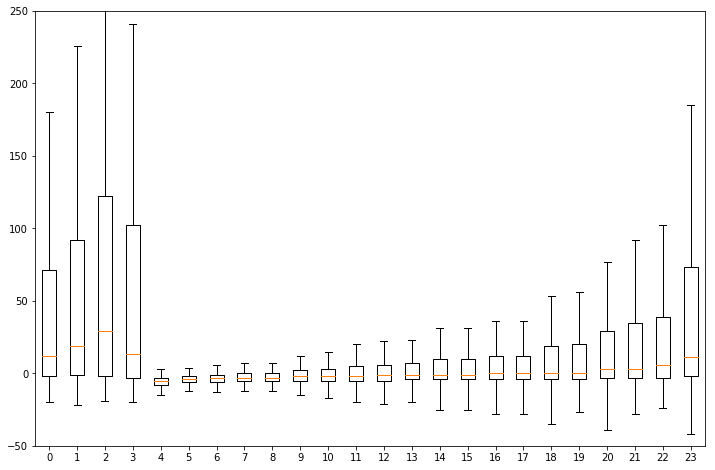

In [312]:
plt.boxplot(groups, labels=keys, showfliers=False)

plt.gca().set_ylim(-50,250)
plt.gcf().set_size_inches(12,8)

Hay bastantes más retrasos de madrugada

Las aerolíneas empiezan el día clavándolo (de hecho salen antes de tiempo) y a medida que van pasando las horas, el retraso va aumentando.

### Everything looks ok! let's plot this thing!